In [1]:
!nvidia-smi

Thu Jan  2 20:06:14 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Paths to the images and labels folders
# images_folder = "format1_Outputn/Images"  # Replace with the path to your images folder
# labels_folder = "labelsF5"  # Replace with the path to your labels folder
# output_base_folder = "Data"

# # Create train, test, and valid folders
# for subset in ["train", "test", "valid"]:
#     os.makedirs(os.path.join(output_base_folder, subset, "images"), exist_ok=True)
#     os.makedirs(os.path.join(output_base_folder, subset, "labels"), exist_ok=True)

# # List all image files and their corresponding label files
# image_files = sorted([f for f in os.listdir(images_folder) if f.endswith(".jpg")])
# label_files = sorted([f for f in os.listdir(labels_folder) if f.endswith(".txt")])

# # Ensure every image has a corresponding label
# image_files = [img for img in image_files if img.replace(".jpg", ".txt") in label_files]

# # Limit the dataset to 1500 records
# image_files = image_files[2500:5000]

# # Split into train, test, and valid sets (80% train, 10% test, 10% valid)
# train_images, test_images = train_test_split(image_files, test_size=0.2, random_state=42)
# test_images, valid_images = train_test_split(test_images, test_size=0.5, random_state=42)

# # Function to copy files to the respective directories
# def copy_files(image_list, subset):
#     for img in image_list:
#         # Copy image
#         shutil.copy(
#             os.path.join(images_folder, img),
#             os.path.join(output_base_folder, subset, "images", img),
#         )
#         # Copy corresponding label
#         label_file = img.replace(".jpg", ".txt")
#         shutil.copy(
#             os.path.join(labels_folder, label_file),
#             os.path.join(output_base_folder, subset, "labels", label_file),
#         )

# # Copy files for each subset
# copy_files(train_images, "train")
# copy_files(test_images, "test")
# copy_files(valid_images, "valid")

# # Print counts of images in each split
# print(f"Dataset with 1500 records has been split and organized!")
# print(f"Training set: {len(train_images)} images")
# print(f"Testing set: {len(test_images)} images")
# print(f"Validation set: {len(valid_images)} images")


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# List all projects for your workspace
workspace = rf.workspace()
print(workspace)
workspace = rf.workspace("cvip-riw9q")
project = workspace.project("cvip-tov6a")
version = project.version(2)
# dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
{
  "name": "cvip",
  "url": "cvip-riw9q",
  "projects": [
    "cvip-riw9q/cvip-tov6a"
  ]
}
loading Roboflow workspace...
loading Roboflow project...


In [5]:
# Define the dataset directory and YAML path
dataset_dir = "/content/drive/MyDrive/Data"
yaml_path = f"{dataset_dir}/data.yaml"

# Define the YAML content
yaml_content = f"""
train: {dataset_dir}/train/images
val: {dataset_dir}/valid/images

nc: 20
names: [
    "businessName", "buyerAddress", "buyerContact", "SRNO", "buyerNTN",
    "buyerName", "buyerSTN", "date", "excl", "incl", "products", "quantity",
    "rate", "sales", "serialNumber", "supplierAddress", "supplierNTN",
    "supplierName", "supplierSTN", "total"
]
"""

# Write the content to the YAML file
with open(yaml_path, "w") as f:
    f.write(yaml_content)

yaml_path


'/content/drive/MyDrive/Data/data.yaml'

In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolo11s.pt data=/content/drive/MyDrive/Data/data.yaml epochs=10 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 236MB/s]
New https://pypi.org/project/ultralytics/8.3.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/drive/MyDrive/Data/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1735848417.fabf71147f42.1881.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


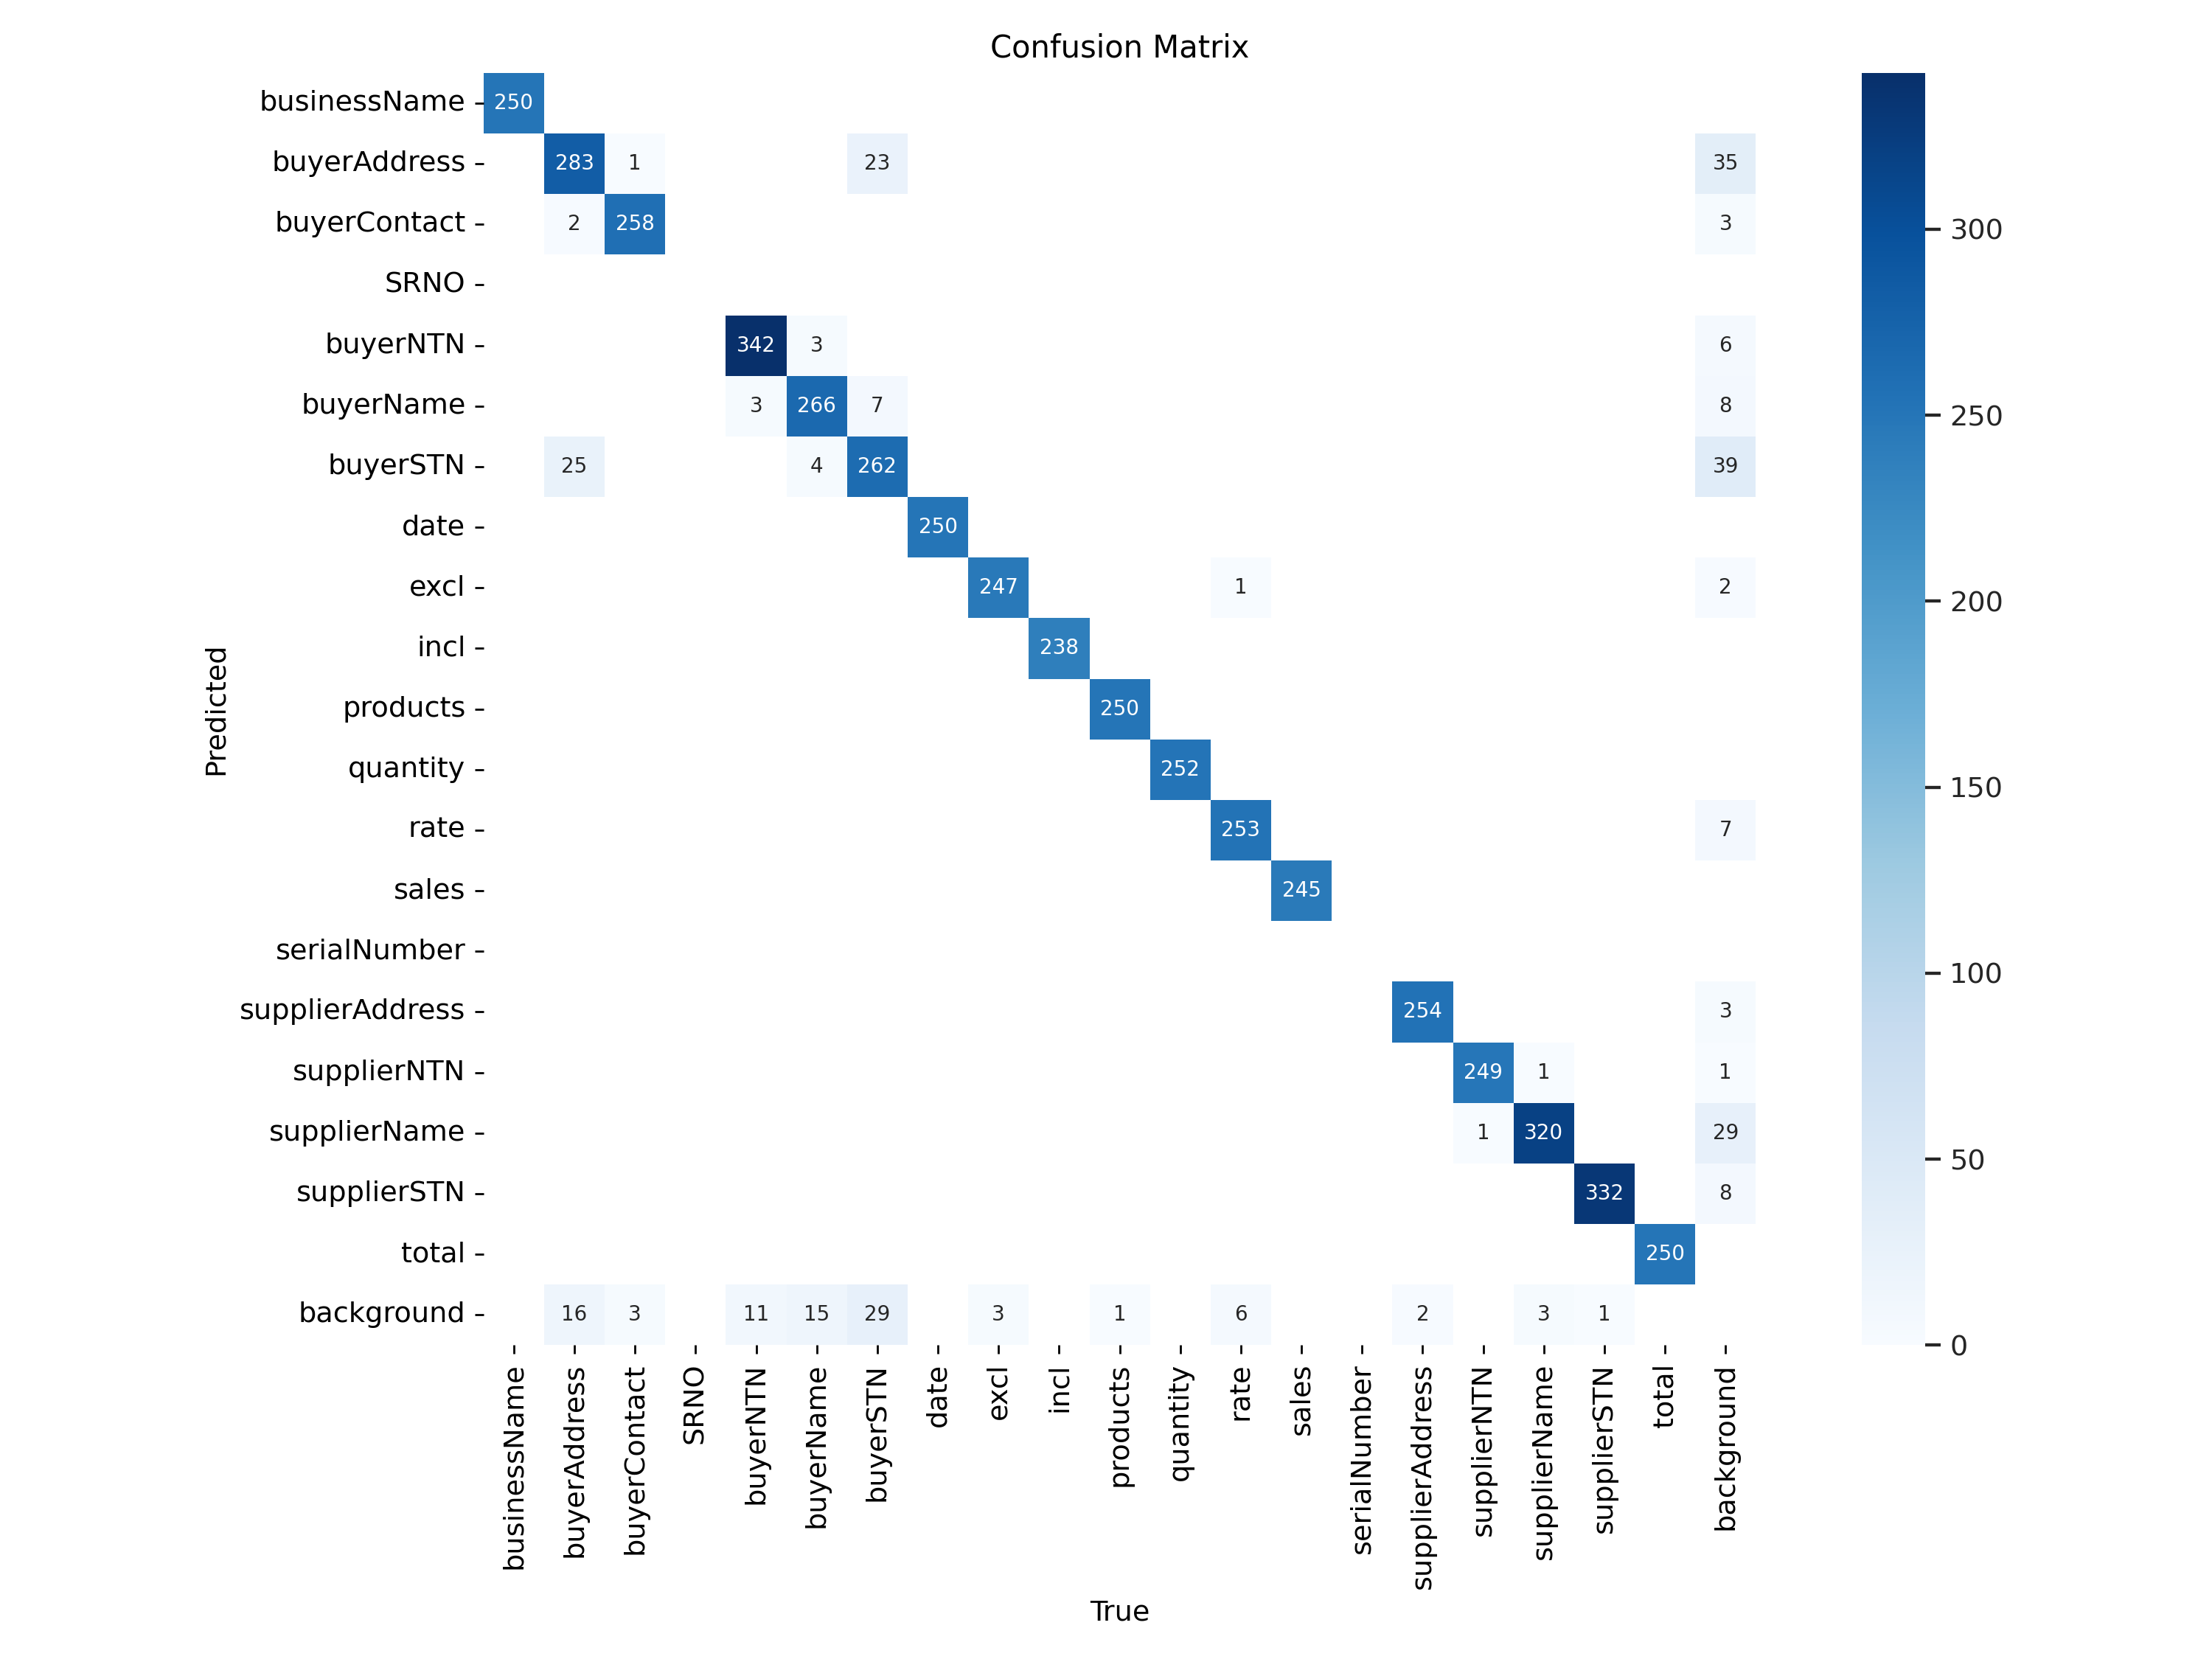

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

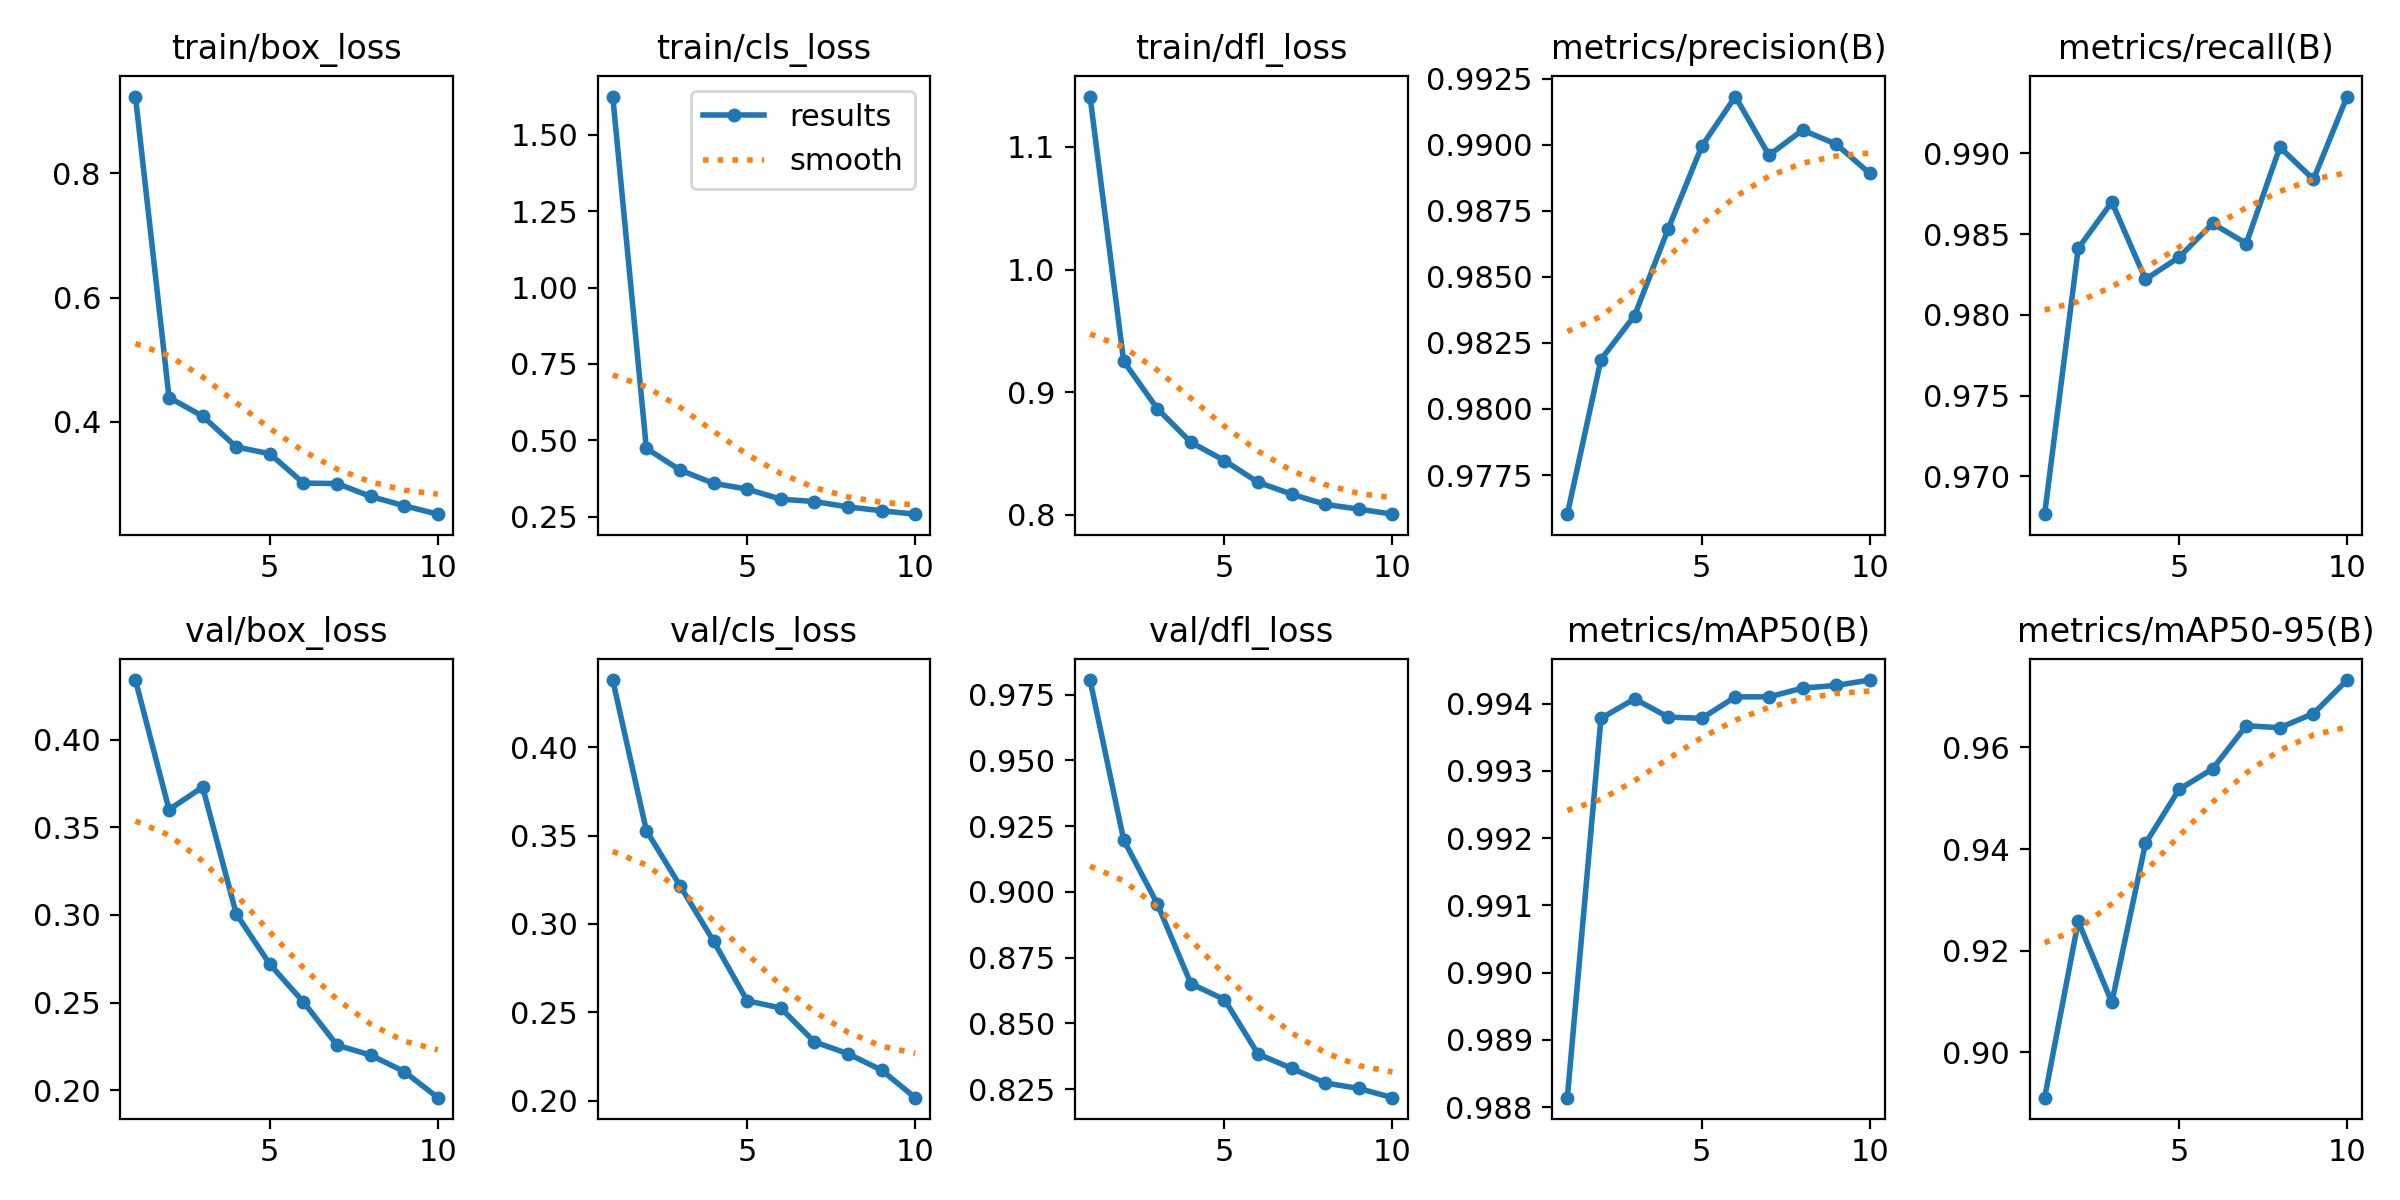

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

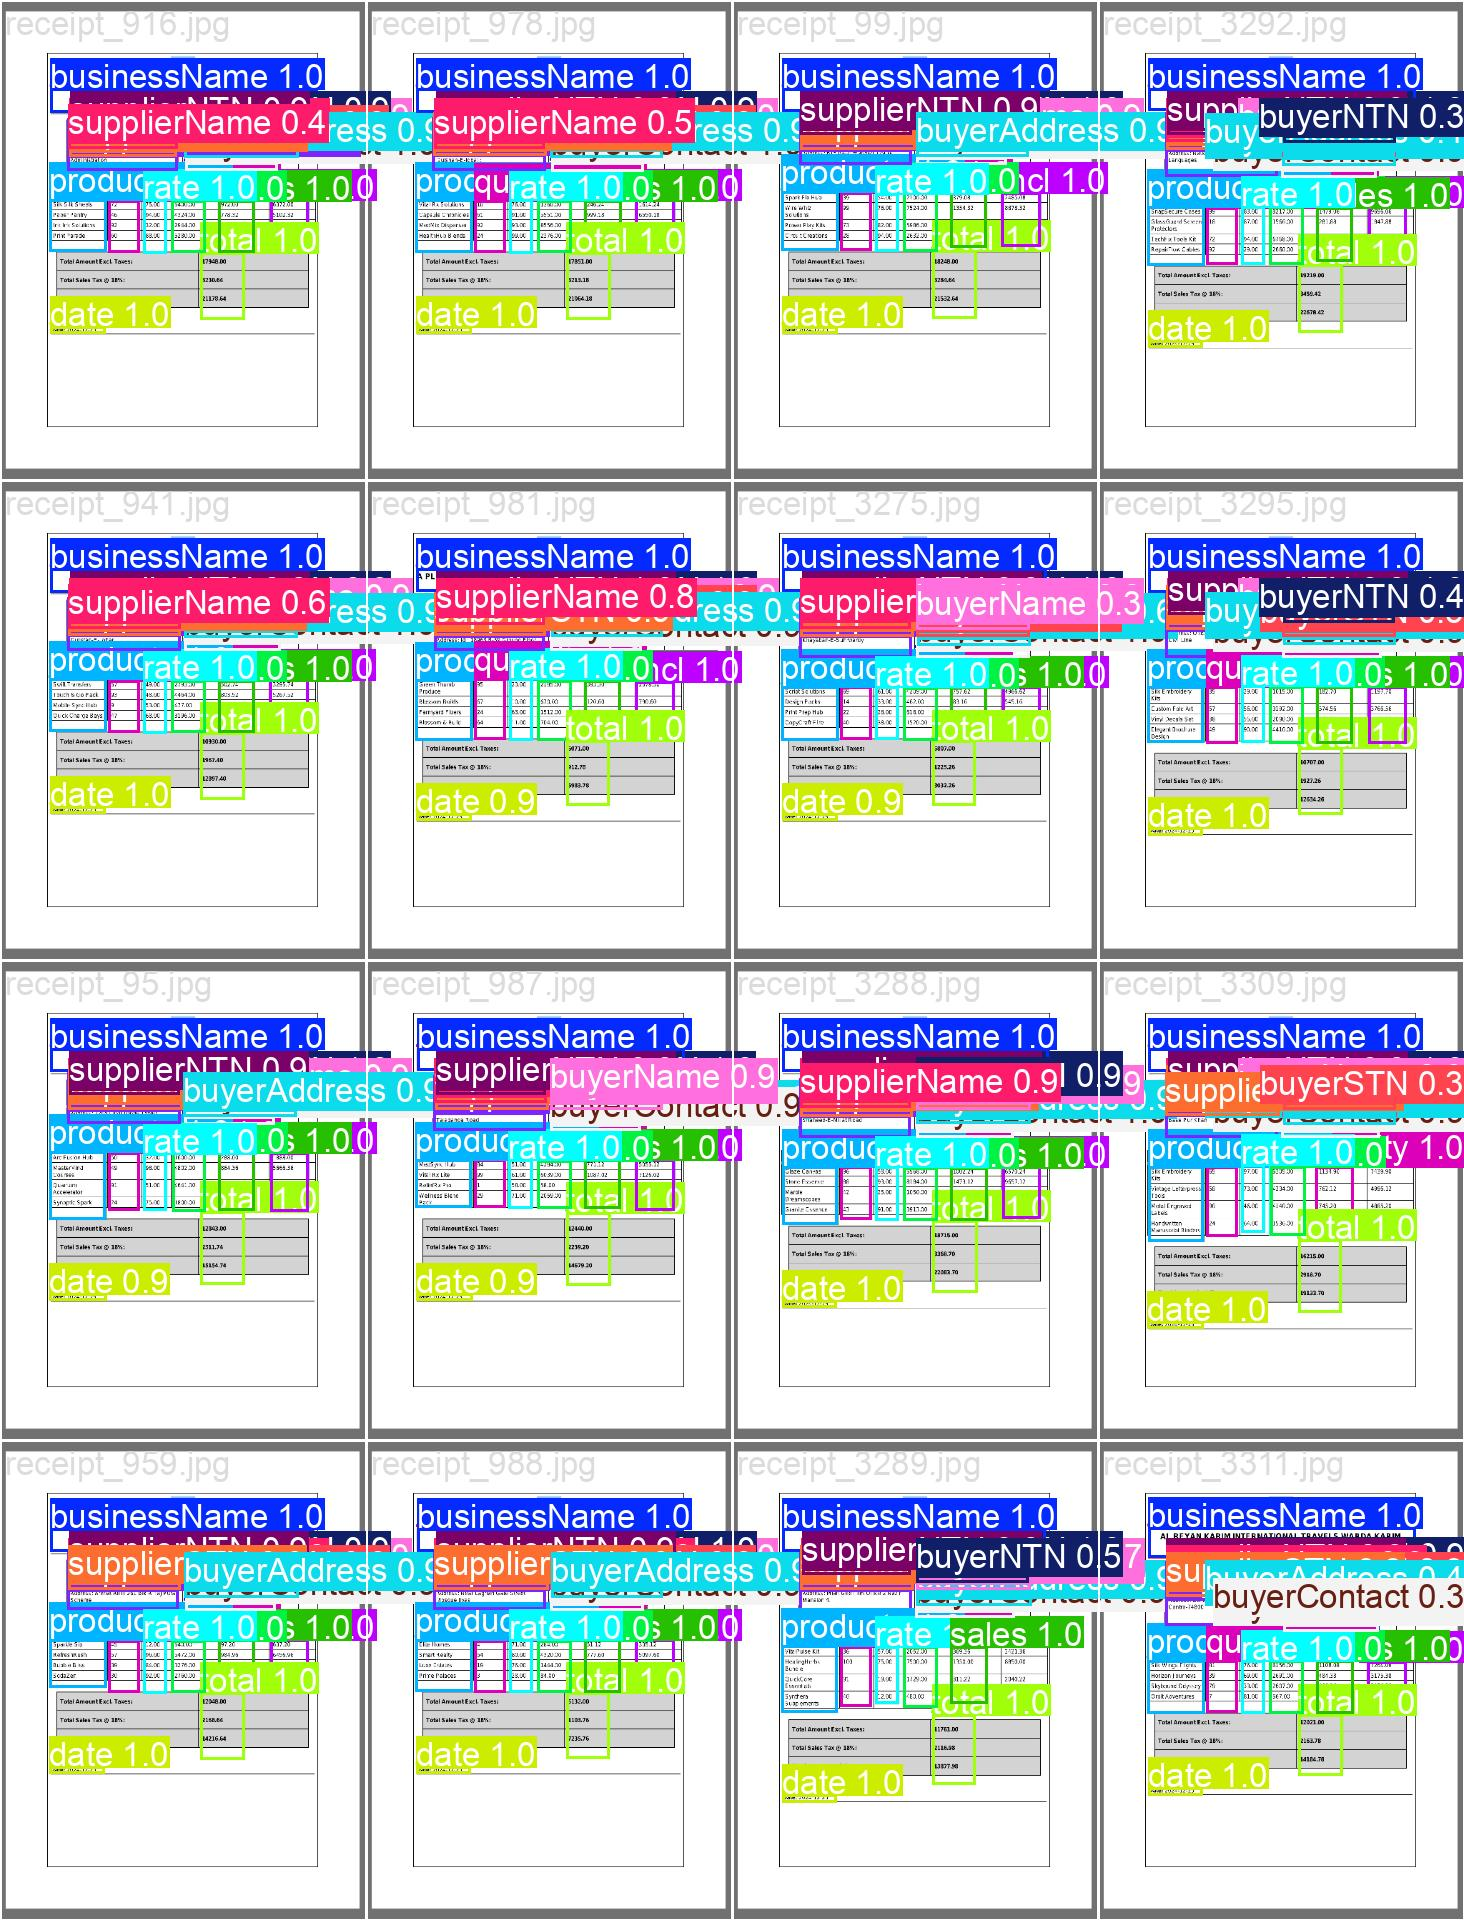

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Data/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,420,540 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/drive/MyDrive/Data/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:15<00:00,  1.02it/s]
                   all        250       4962      0.989      0.993      0.994      0.977
          businessName        250        250      0.997          1      0.995      0.995
          buyerAddress        250        326       0.95      0.985      0.993      0.935
          buyerContact        250        262      0.986      0.989      0.994      0.979
              buyerNTN        250        356      0.997      0.983      0.995       0.97
             buyerName        250        288      0.996      0.978      0.993      0.966
              buyerSTN        250        3

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.18 source=/content/drive/MyDrive/Data/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,420,540 parameters, 0 gradients, 21.3 GFLOPs

image 1/250 /content/drive/MyDrive/Data/test/images/receipt_3293.jpg: 640x512 1 businessName, 1 buyerAddress, 1 buyerContact, 2 buyerNTNs, 1 buyerName, 1 buyerSTN, 1 date, 1 excl, 1 incl, 1 products, 1 quantity, 1 rate, 1 sales, 1 supplierAddress, 1 supplierNTN, 1 supplierName, 1 supplierSTN, 1 total, 47.2ms
image 2/250 /content/drive/MyDrive/Data/test/images/receipt_33.jpg: 640x512 1 businessName, 1 buyerAddress, 1 buyerContact, 1 buyerNTN, 1 buyerName, 1 buyerSTN, 1 date, 1 excl, 1 incl, 1 products, 1 quantity, 1 rate, 1 sales, 1 supplierAddress, 1 supplierNTN, 1 supplierName, 1 supplierSTN, 1 total, 12.4ms
image 3/250 /content/drive/MyDrive/Data/test/images/receipt_3310.jpg: 640x512 1 businessName, 2 buyerAddresss, 1 buyerContact, 1 buyerNTN, 2 buyerNames, 1 buyerSTN, 1 date, 1 excl, 1 incl, 1 products, 1 quantity, 1 r

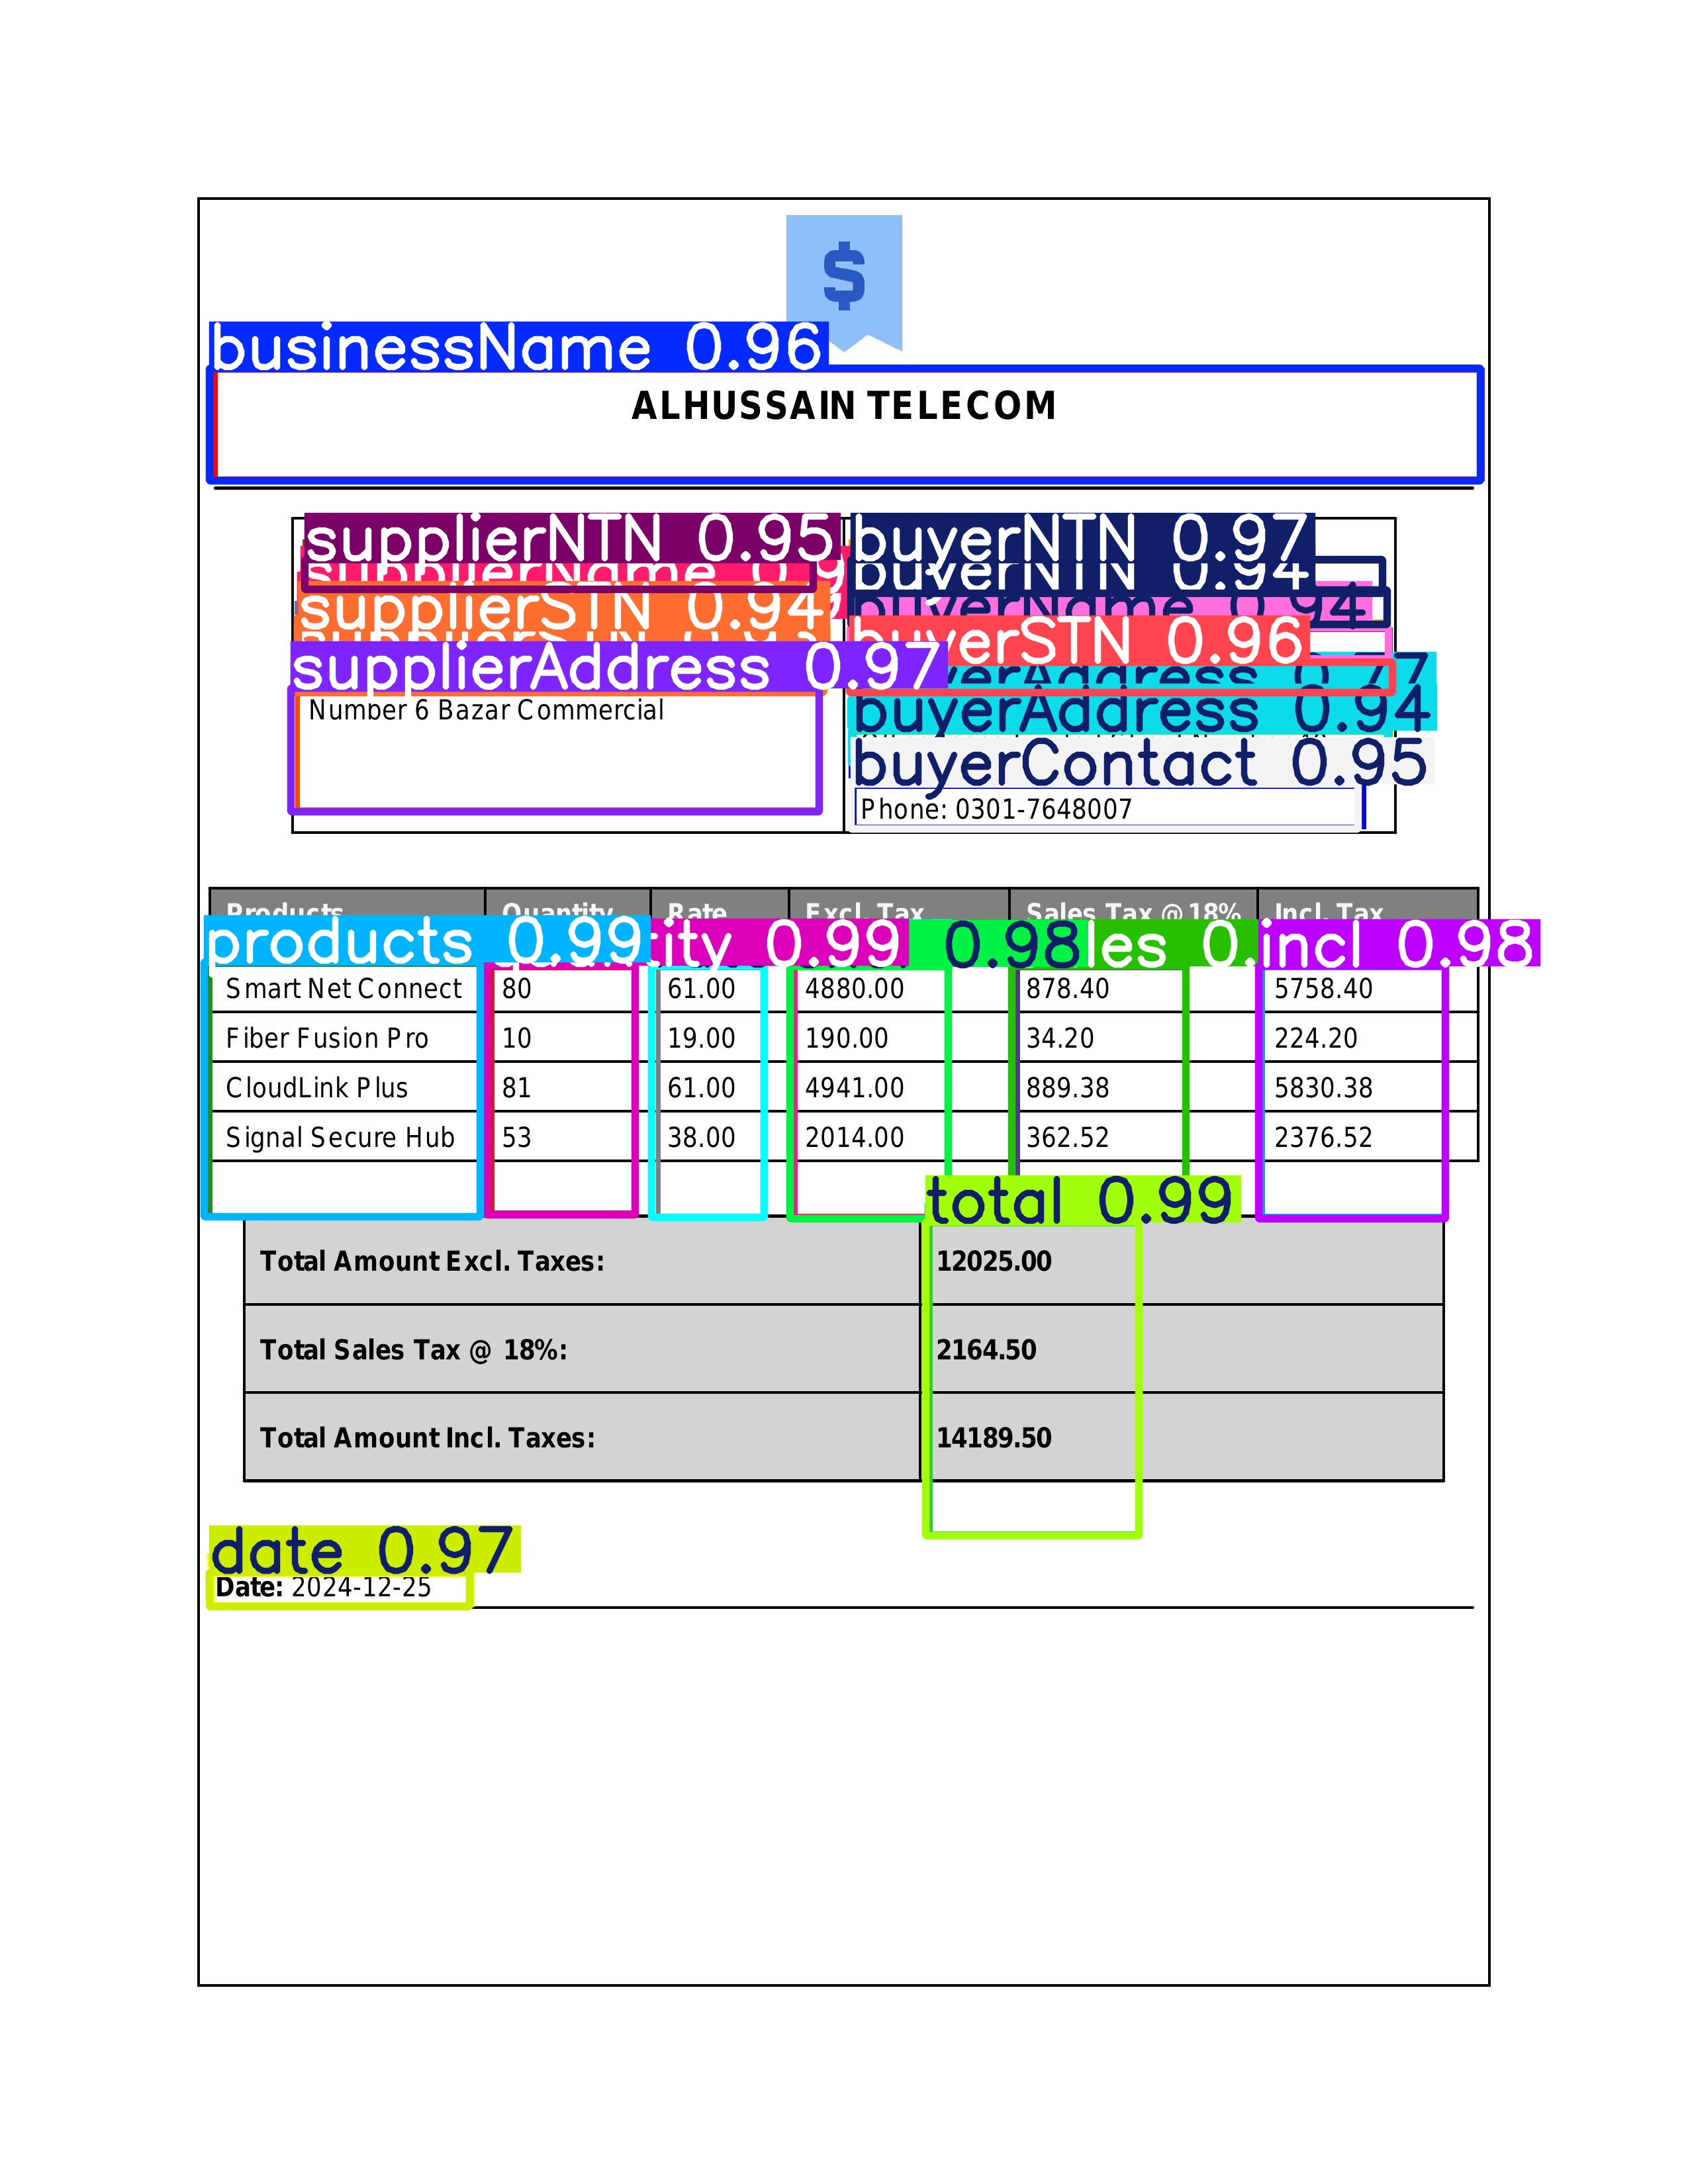

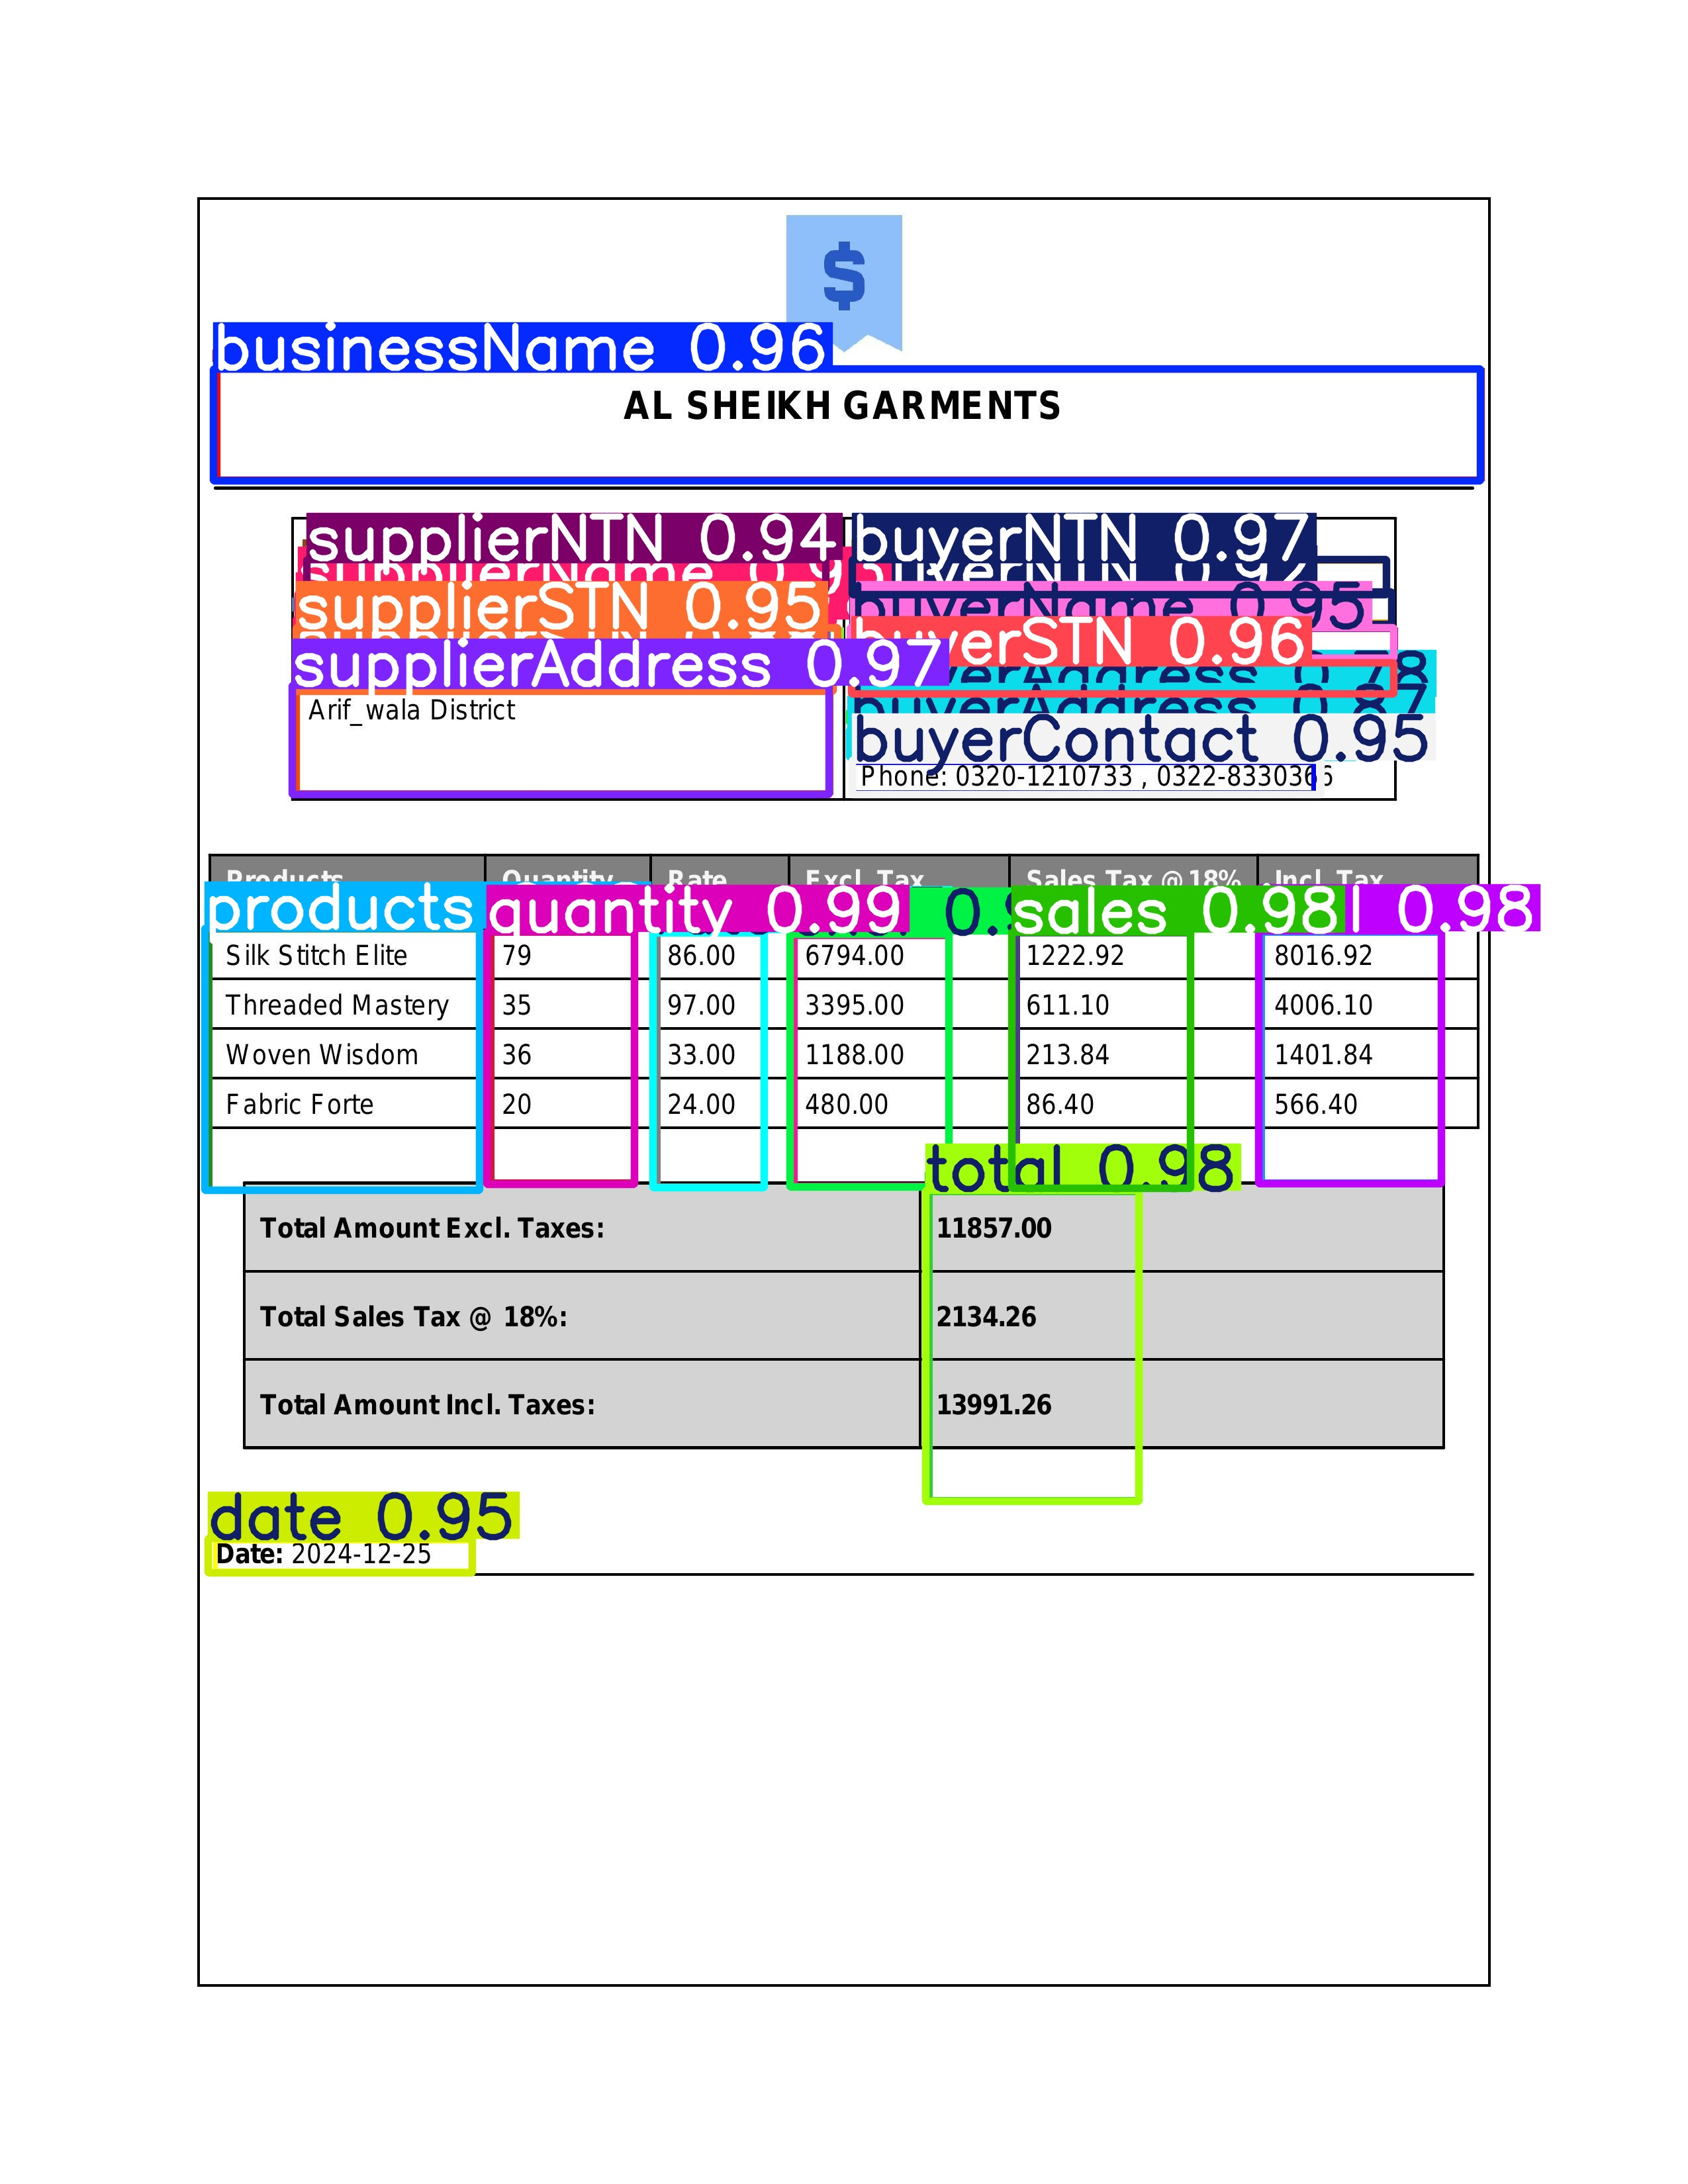

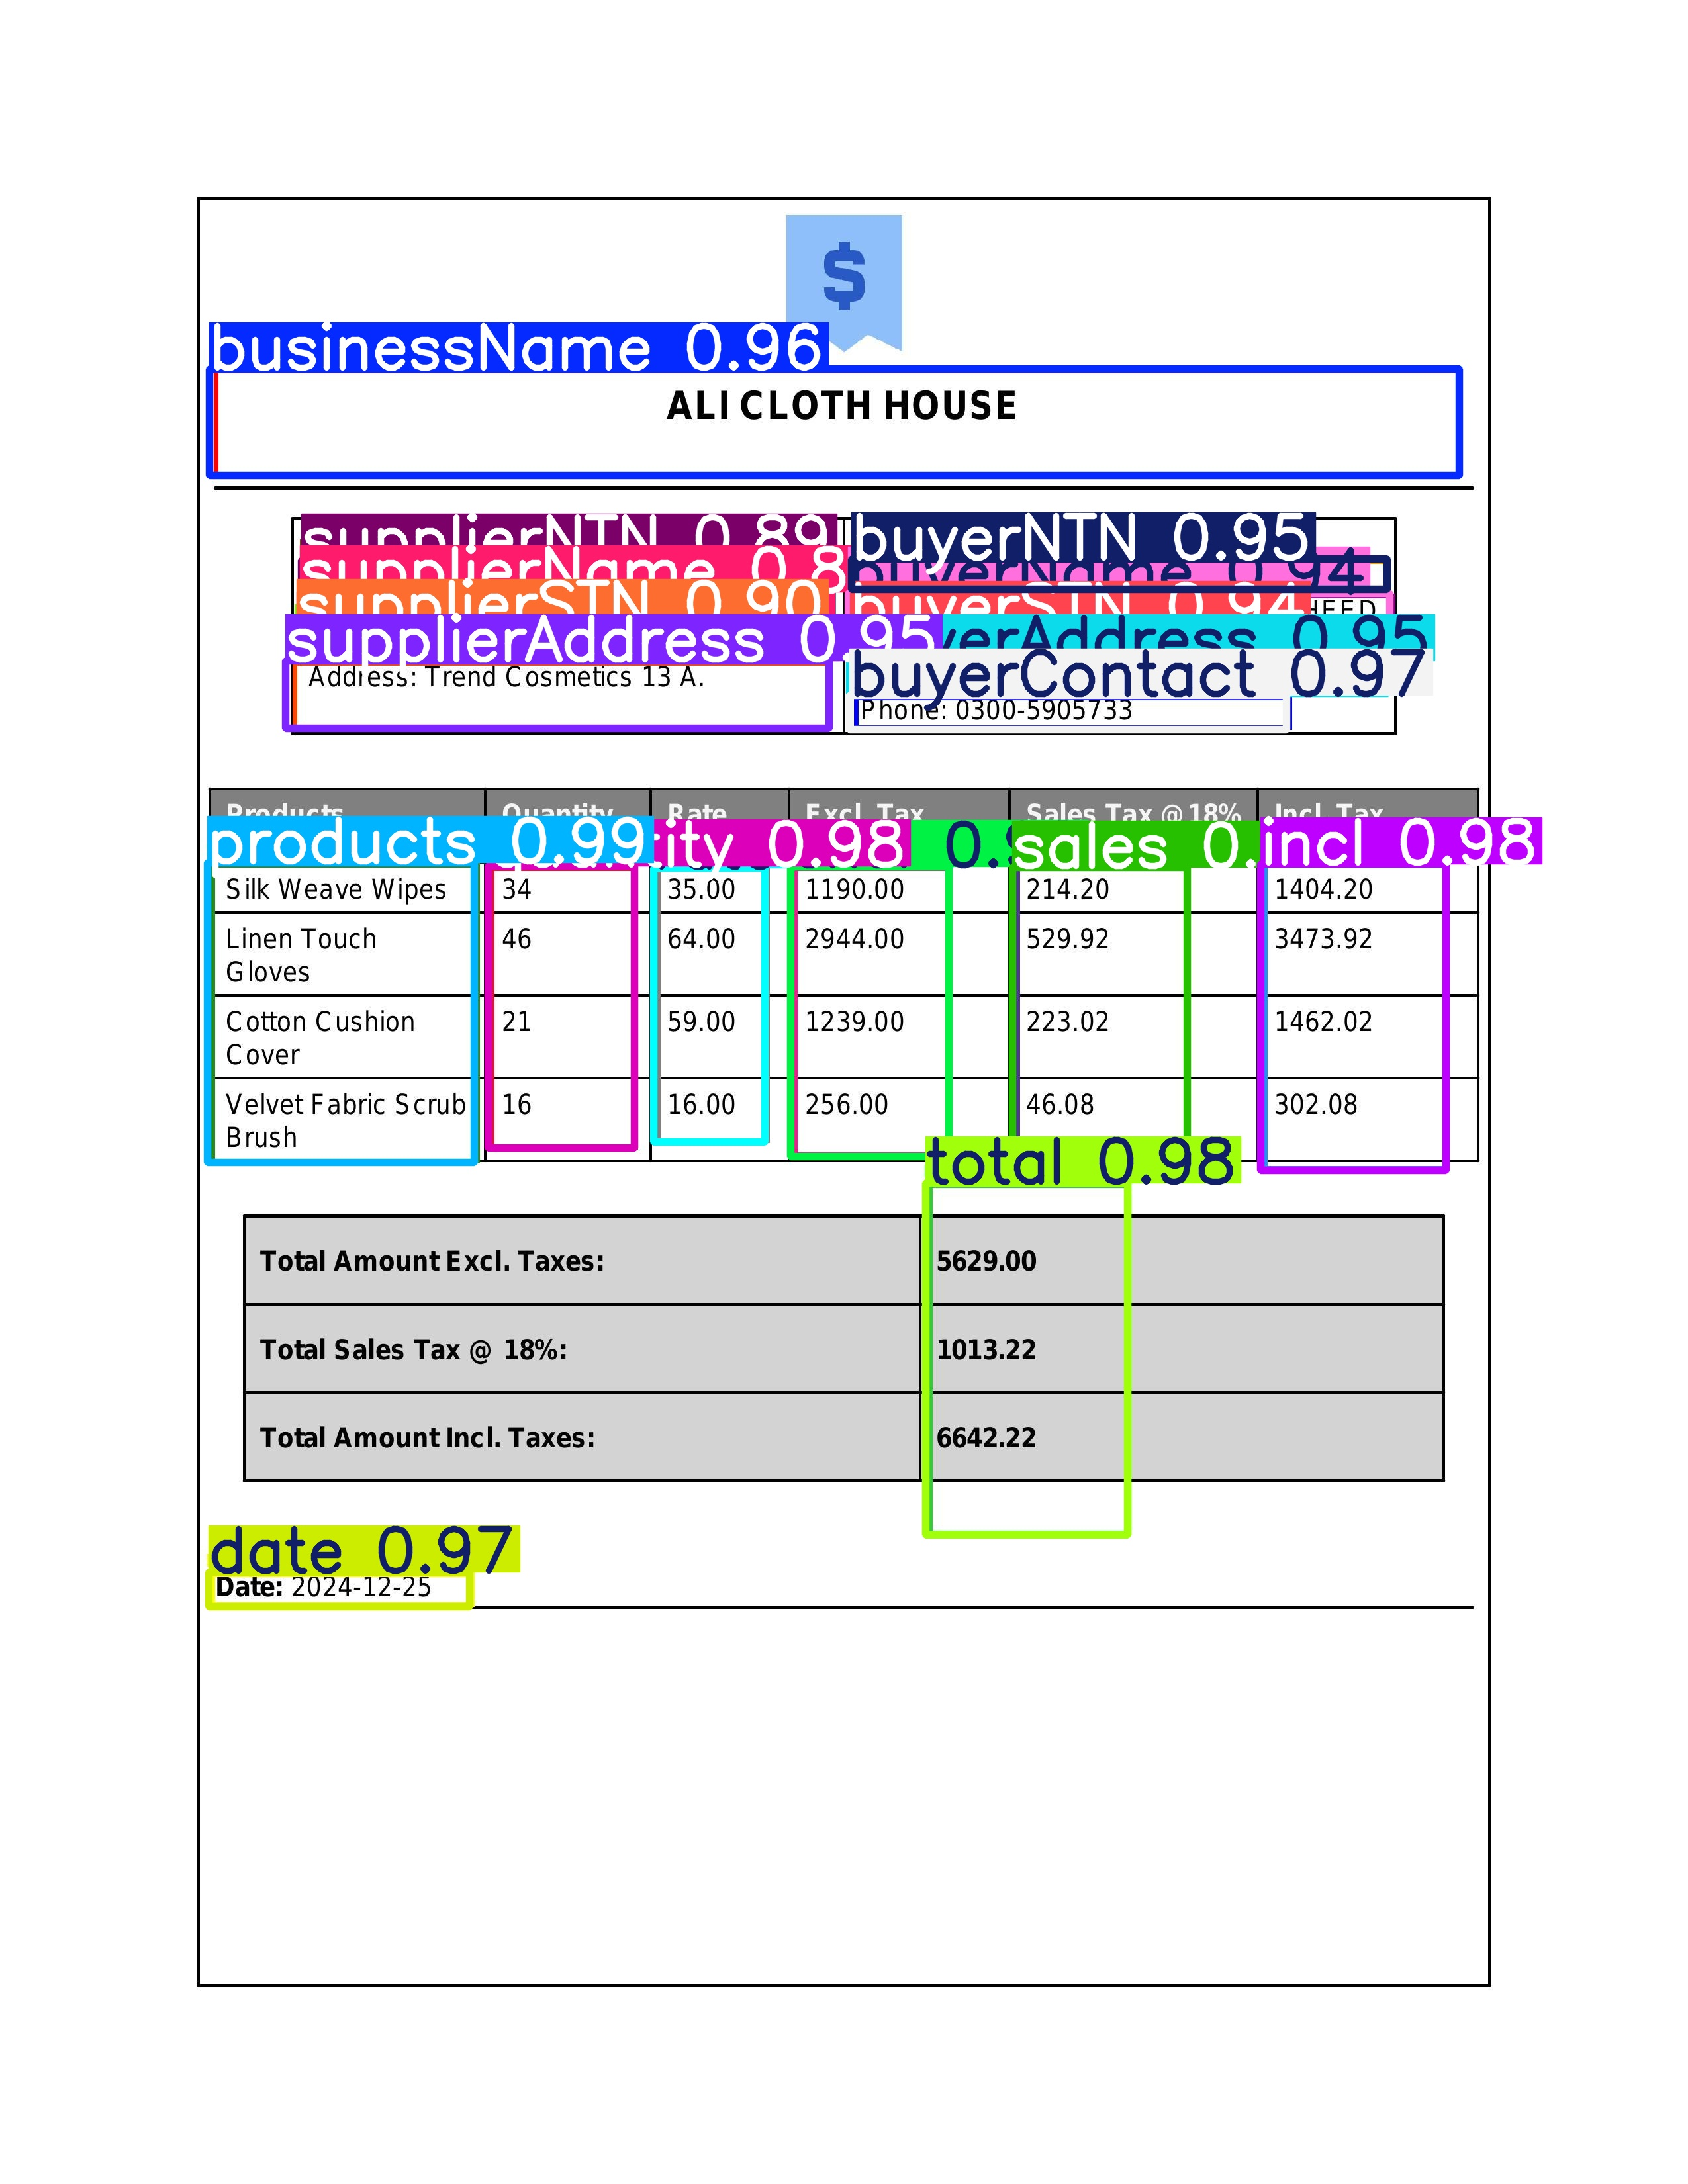

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")